In [32]:
# matplotlib kernel
import pandas as pd
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mcherry = pd.read_csv("PSAD_mCherry1-4_activities.csv", index_col=0)
mcherry["prot_seq"] = [str(Seq(seq).translate()) for seq in mcherry["AD"]]
mcherry = mcherry.drop(["0","1","2","3","AD"], axis=1)
mcherry.columns = ["BC","abundance","aa_seq"]
mcherry

,BC,abundance,aa_seq
0,TTGATTACCTATGA,154.350678,KSDTTMEEDEDGDVSLSGGLESNFLDNLQCILDEDLVSAV
1,ATCTATCTAGCAGA,140.815736,IDLSRLNGYDQLILELEESLGDDQFMFINGVSSTVLGQWR
2,AGAAACCCCCGAAC,129.583752,KSKCENIDHLFSTRAEANETDEDSVPELLQHMFLEAFIDW
3,CAGCACAGTGTGTA,427.201933,PEEETKAAEPNYGSVAISLPLERTISSQSMERSGSSSSGS
4,CCCTGTACCTAAAA,192.296193,ISPFSDMLIDDQPWSFLMENDLFSAYMNLDKSNKVLFDVD
...,...,...,...
45200,TGCTATTAAAGGAG,517.000000,FNFPHLLTTSLSDDFKGFFNDDDENIFPFFSALDDLLRES
45201,ACTTGACTTATTAT,517.000000,GVPELASLAGLNPIPELLNGGGGDDNMDEFLDFSATRRGT
45202,TATGAAATAAGGAT,517.000000,DSIPLDSKHSQAPNVEEGIDHSLEEDLLYMYLDMDDKVPT
45203,AAAGAATACTATTA,517.000000,DSQEIDDINDYSLTSLWGLRPDLLSTFFDSFFPTDGRNEK


In [5]:
gfp = pd.read_csv("PSAD_GFP1-8_activities.csv", index_col=0)
gfp["prot_seq"] = [str(Seq(seq).translate()) for seq in gfp["AD"]]
gfp = gfp.drop(["0","1","2","3","4","5","6","7","AD"], axis=1)
gfp.columns = ["BC","activity","aa_seq"]
gfp

,BC,activity,aa_seq
0,GCACAAAAGTGACA,1199.338586,SRWWSLDKLSINLFLNFDPFLGNYDHDFEFADSVASIQGS
1,ACATAATAATATAA,3252.130603,PPLDPLFLDEDVPLFLDEETKISNIVDESLSPEDELEGEL
2,TGTGTACGAGAGTC,1040.490551,LKCGVESFFSSWEKSCSIRWLDGPALSGSGLLSDIFTDWL
3,TCAAAGGCGTGAAG,633.404585,LSYFFDHLIDNLAQLSEIFEDLEDIIDGSLVDEDDLPSSF
4,ATGACACATGTCTC,541.968904,SLTGPLSILDLEVAFSVLDLQGLLEGKEQLFDICDDTECQ
...,...,...,...
46643,ATCAAACACTTATT,16581.000000,MASFNEISDIEAGLVFPDVLLESPVIGETDEEFLDFSANA
46644,CGCATCATAGATTG,16581.000000,LLDIGSVPPPLDPLFLQDNDILFPLDSLLDDDTFMSLAFE
46645,ATCCTACCCACCAC,16581.000000,LEQKEVSLLSFPHSFGGNYTNDEFLDFSSLLFDYEDMEFW
46646,AAAATAAACGTTCG,16581.000000,ELSILDLFDIPNPILEHGPDDWDVCACDFDTDNGLELWSE


In [6]:
new_df = mcherry.merge(gfp, on=["BC","aa_seq"])

In [31]:
new_df.to_csv("marissa_data_wrangled.csv")

In [21]:
averaged_activities = pd.DataFrame([new_df.groupby("aa_seq")["activity"].mean(),new_df.groupby("aa_seq")["activity"].std()]).T
averaged_activities.columns = ["activity","activity_std"]
averaged_abunds = pd.DataFrame([new_df.groupby("aa_seq")["abundance"].mean(),new_df.groupby("aa_seq")["abundance"].std()]).T
averaged_abunds.columns = ["abundance","abundance_std"]

In [23]:
averaged_df = averaged_activities.merge(averaged_abunds, left_index=True, right_index=True)
averaged_df

,activity,activity_std,abundance,abundance_std
aa_seq,,,,
AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE,2998.900453,NaN,468.881757,NaN
AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV,3296.634571,NaN,312.143504,NaN
AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF,7699.309003,807.776558,240.421461,34.900357
AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP,5480.599003,1011.252956,252.884922,50.010381
AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN,6164.547720,NaN,440.446675,NaN
...,...,...,...,...
YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS,13805.477165,1177.165879,161.573960,55.704165
YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE,13594.786177,NaN,159.374865,NaN
YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS,501.915275,NaN,109.030773,NaN


In [9]:
# averaged_df = averaged_df[averaged_df["activity_std"] < 500]
# averaged_df = averaged_df[averaged_df["activity"] > 2300]
# averaged_df

,activity,activity_std,abundance,abundance_std
aa_seq,,,,
AAAKGLLSPPLFMVDQMSFPLDISQGSLSLFPGFDDFGSF,11252.086748,93.476943,80.162936,23.686906
AADLPSLGTVGDFDFPIWSLPPLQLQARNQWEIAFTDSIV,3225.180597,436.727883,129.852466,22.679454
AADLRDEFGVDEEMCYEDLEWLSNFVELLFDGCWLETTDS,4771.414983,427.386180,322.566490,130.267971
AAENTCDDHVTPSSYIELENEEVDLFFMGDSIPEIDFADA,9854.815451,299.422013,384.225746,12.029460
AAHYFLMINEEDELLDLEDDPDVYDFDSEENWVDDSWEAF,3454.318899,283.628380,416.663806,30.828378
...,...,...,...,...
YVEGDYYEDTLDPIDGFGNFDGNFIDLDWNDITTPEGNPL,15103.033001,361.028559,391.068641,30.780413
YVVSEDLILFSESHRSFYEYDFYDQSPFLPPSTSYEDHHL,3163.281229,256.252119,207.835610,94.930138
YYDDDDVDDLLDFSSLPPCWDPSGDFLASFLSLGNTTDLS,14131.044279,260.018337,367.819178,210.973542


In [24]:
averaged_df[averaged_df["activity"] == max(averaged_df["activity"])]

,activity,activity_std,abundance,abundance_std
aa_seq,,,,
AFPENNEPPTEFNLELDLSYFLLSDVDLEEWWNDFFSREP,16581.0,NaN,517.000000,NaN
DDFLVPPETPDPFSEFLSVALQLPEDCQAVIWSDLDFSDL,16581.0,NaN,165.000000,NaN
EELQGMGEETDVDQFLQNLFPTPSFMVDENLVDTLLDDQS,16581.0,NaN,365.942948,NaN
EFDDFNFEDYLTFFDETFDINELLGISSSNFVLDPSYSDQ,16581.0,NaN,441.287056,NaN
ELEVSEHLRSNSSRRRSATTSSPPSGTHSSVSGVNSRKRD,16581.0,NaN,430.699278,NaN
FNPVILQLEDIEKLLSSDDSLEPNMYGDDASVMEAFIGGG,16581.0,NaN,165.000000,NaN
GVDYLENDFFNFDGEFNDMENNFSQSPYSYFLIDDIESIF,16581.0,NaN,171.320823,NaN
IAEETLAEFDPFSDMLIDDIEKLFDLPDLFDEIANNNTVC,16581.0,0.0,359.939899,77.602935
IHHFCDDQFLFDDLSLGDLKEQMLFDEIFQMHEDYLEAIL,16581.0,NaN,103.352166,NaN


(array([594., 530., 460., 343., 340., 218., 194., 138., 131., 101.,  75.,
         80.,  66.,  80.,  90.,  73.,  73.,  88., 128., 143.]),
 array([ 2301.69911101,  3015.66415546,  3729.62919991,  4443.59424436,
         5157.55928881,  5871.52433326,  6585.4893777 ,  7299.45442215,
         8013.4194666 ,  8727.38451105,  9441.3495555 , 10155.31459995,
        10869.2796444 , 11583.24468885, 12297.2097333 , 13011.17477775,
        13725.1398222 , 14439.10486665, 15153.0699111 , 15867.03495555,
        16581.        ]),
 <BarContainer object of 20 artists>)

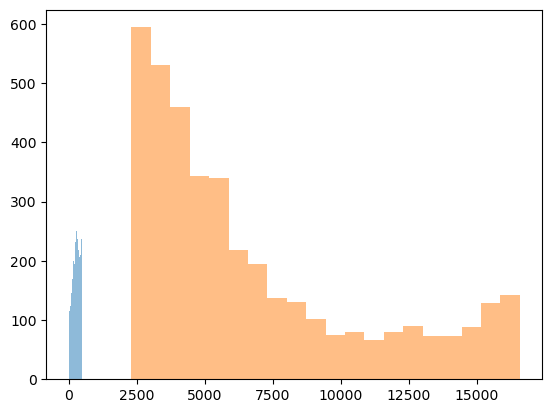

In [11]:
plt.hist(averaged_df["activity_std"], bins=20, label="std", alpha=0.5)
plt.hist(averaged_df["activity"],label="mean", bins=20, alpha=0.5)

In [88]:
averaged_df.to_csv("marissa_data_wrangled_averaged_highly_variable_low_vals_removed.csv")

In [12]:
orig_data = pd.read_csv("pm_gcn4_sort2_pools_allchannels_wrangled.csv")
orig_data

,aa_seq,activity,abundance,ratio
0,LQDFVLFDQPIRPHRQHNRNALQPPTRGINLNQQHRSQHL,270.500000,2275.157246,23705.971880
1,DLFGGLESSTPWIREQERIHLQYVEGLRWVTWGQMGHVEL,478.640464,4281.992228,7965.856073
2,VEHSPAEKSDDLEVVEPTSGHQRRKSGTSPPSGRHSSVSG,1081.420642,3180.013344,18161.451312
3,NAGTASRFLTTVVALCSPSDVSSTVLTGNARMQVRPIGPL,603.933187,1160.105019,52119.378755
4,QQQHRPHSTLQASSASPIQNPRVSDLSQDTGSIASSTSPQ,425.945104,3136.116978,19044.671497
...,...,...,...,...
17727,LYDESPDFGSGFDVSPNFAGSDFDAGGNDVWFPLFPQSNT,8178.009196,3209.784417,262143.000000
17728,HANRGPDFDALFDLTANSFVDGLDAASLAMFDTQQLDKVQ,9064.000000,4649.000000,262143.000000
17729,LYESPDFGYDVSPGFGSNDFDTGSNQWFSLFPDQSTTPDA,9064.000000,4649.000000,262143.000000
17730,TPNIPQEFFDFTEGFGEEFTDSTMLSPHLVPTGIMASKDS,4862.343223,111.000000,262143.000000


In [13]:
max(orig_data["activity"])

9064.0

In [14]:
max(pd.read_csv("pm_gcn4_sort2_pools_allchannels_wrangled_w_ratio_validation_heirarchical.csv")['activity'])

9064.0

In [15]:
orig_data_no_min = orig_data[orig_data["activity"] > min(orig_data["activity"])]

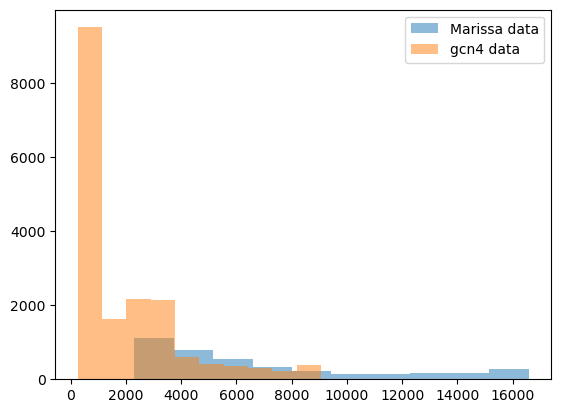

In [16]:
plt.hist(averaged_df["activity"], alpha=0.5, label="Marissa data")
plt.hist(orig_data["activity"],alpha=0.5, label="gcn4 data")
plt.legend()

In [25]:
merged_df = averaged_df.merge(orig_data, left_index=True, right_on="aa_seq")
merged_df

,activity_x,activity_std,abundance_x,abundance_std,aa_seq,activity_y,abundance_y,ratio
1021,508.147805,19.423062,445.059681,40.818446,AAEPNYGSVAISLPLERTISSQSMERSGSSSSGSPVVLDG,306.456053,3884.255210,16589.403054
1230,507.119812,NaN,398.862279,NaN,AAIALSQPETIPAKEISVPPSPAVGKSASPAPSPAPSKSG,319.209445,3263.198503,15079.439643
1263,516.000285,33.941529,446.197484,61.395269,AALDVALALSQPETKPAKEVSVPPSPAIRNSASPAPSPAP,572.350000,3165.146888,18571.595682
467,500.355645,11.816666,471.923357,4.314340,ADPFSTSAQVALGTPDMDSTAMTPSMSRRSSSPGSSPKSG,568.358928,3738.986128,18144.372576
4983,551.006463,NaN,388.834223,NaN,AGVNARQRKPLPVIKFDSNDPVAMKRARNTEAARKSRARK,333.934651,3463.404911,17010.694294
...,...,...,...,...,...,...,...,...
256,562.257344,39.062396,419.870294,43.503415,VSAPPKTVPPPPSPMVRAASSPGQSTGTSRNGSSTSTTKH,471.311724,3713.771729,14711.939269
1825,517.014140,7.143844,432.713262,46.426628,VSEHLRNSTGRRRSGTGTSPSGTHASIAGVNSRKRDKPLP,568.389298,3613.863964,16218.023757
1003,524.172389,38.046193,440.060064,47.215716,VSHFAGASSPATQTAPVMSRNDSSPGQSSSRSSHQGRHSF,301.566977,3589.402817,15543.624459
1270,526.474000,29.857904,395.928749,44.393097,VVADVSRDRITESPASNTHVAPMMSRYDSSPGQSSSRGSQ,401.229120,3660.511804,17829.235122


(0.0, 2000.0)

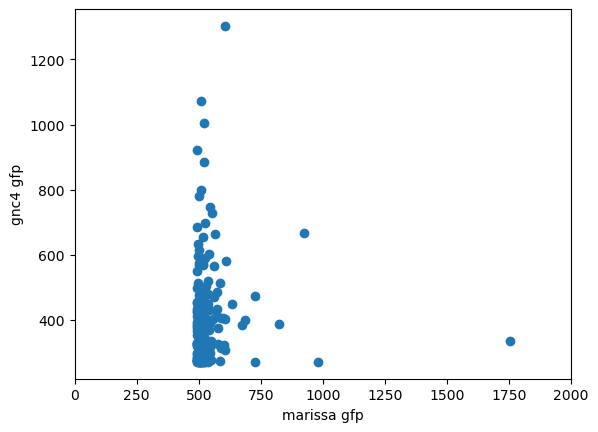

In [26]:
plt.scatter(merged_df["activity_x"], merged_df["activity_y"])
plt.ylabel("gnc4 gfp")
plt.xlabel("marissa gfp")
plt.xlim(0,2000)

Text(0.5, 0, 'marissa mcherry')

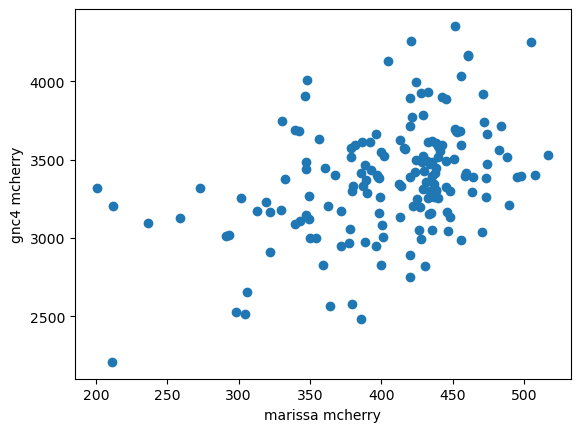

In [27]:
plt.scatter(merged_df["abundance_x"], merged_df["abundance_y"])
plt.ylabel("gnc4 mcherry")
plt.xlabel("marissa mcherry")

In [28]:
averaged_df

,activity,activity_std,abundance,abundance_std
aa_seq,,,,
AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE,2998.900453,NaN,468.881757,NaN
AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV,3296.634571,NaN,312.143504,NaN
AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF,7699.309003,807.776558,240.421461,34.900357
AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP,5480.599003,1011.252956,252.884922,50.010381
AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN,6164.547720,NaN,440.446675,NaN
...,...,...,...,...
YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS,13805.477165,1177.165879,161.573960,55.704165
YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE,13594.786177,NaN,159.374865,NaN
YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS,501.915275,NaN,109.030773,NaN


In [ ]:
# HOW TO TRANSFORM THE DATA??????

In [29]:
new_df

,BC,abundance,aa_seq,activity
0,TTGATTACCTATGA,154.350678,KSDTTMEEDEDGDVSLSGGLESNFLDNLQCILDEDLVSAV,4262.276576
1,ATCTATCTAGCAGA,140.815736,IDLSRLNGYDQLILELEESLGDDQFMFINGVSSTVLGQWR,5401.708189
2,AGAAACCCCCGAAC,129.583752,KSKCENIDHLFSTRAEANETDEDSVPELLQHMFLEAFIDW,3188.663048
3,CAGCACAGTGTGTA,427.201933,PEEETKAAEPNYGSVAISLPLERTISSQSMERSGSSSSGS,518.608514
4,CCCTGTACCTAAAA,192.296193,ISPFSDMLIDDQPWSFLMENDLFSAYMNLDKSNKVLFDVD,4561.107192
...,...,...,...,...
44029,ACAACACTGACGAG,517.000000,LIKATSLVSPELDNAINDAALERVADTNDDLQDDSLDDRV,492.000000
44030,ACTTGACTTATTAT,517.000000,GVPELASLAGLNPIPELLNGGGGDDNMDEFLDFSATRRGT,3324.438775
44031,TATGAAATAAGGAT,517.000000,DSIPLDSKHSQAPNVEEGIDHSLEEDLLYMYLDMDDKVPT,1618.174050
44032,AAAGAATACTATTA,517.000000,DSQEIDDINDYSLTSLWGLRPDLLSTFFDSFFPTDGRNEK,4916.000000


In [30]:
# Marissa's data is just random sequences, so randomly split into training and testing files??

averaged_df

,activity,activity_std,abundance,abundance_std
aa_seq,,,,
AAAAAIACELRTDNYFEYPDLSILDALDNDSDETMSLIDE,2998.900453,NaN,468.881757,NaN
AAAAASDHSDVNDIIELGGLSNRLYDFYSDLEDIENDIAV,3296.634571,NaN,312.143504,NaN
AAADGASFSDDTDEDLYKYDPWDLPGLSVIKTDDPEWFFF,7699.309003,807.776558,240.421461,34.900357
AAADGASFSDDTDEDLYKYDPWELPSKASFGEQEWYFFSP,5480.599003,1011.252956,252.884922,50.010381
AAADGPDCDTREFCELRDSLLWNESCFLLDDDKRFDVSEN,6164.547720,NaN,440.446675,NaN
...,...,...,...,...
YYSDDIMLDLGVDLSNFQFDFRYFGLDSPLSPPWNEDDDS,13805.477165,1177.165879,161.573960,55.704165
YYSEQSCYLDLDLDLDITFLDFSQFLEQLLQSKNDPLVSE,13594.786177,NaN,159.374865,NaN
YYSEQSCYLNFPPLDCVDLVATLSEKFKSFSQLLLDFPIS,501.915275,NaN,109.030773,NaN


In [41]:
averaged_df = averaged_df.iloc[np.random.default_rng(seed=25).permutation(len(averaged_df))]

In [51]:
split1 = int(len(averaged_df)/5)
split2 = int(2*len(averaged_df)/5)
split3 = int(3*len(averaged_df)/5)
split4 = int(4*len(averaged_df)/5)

In [53]:
averaged_df_g1 = averaged_df.iloc[:split1]
averaged_df_g2 = averaged_df.iloc[split1:split2]
averaged_df_g3 = averaged_df.iloc[split2:split3]
averaged_df_g4 = averaged_df.iloc[split3:split4]
averaged_df_g5 = averaged_df.iloc[split4:split5]

In [55]:
averaged_df_g1.to_csv("marissa_data_wrangled_averaged_group1.csv")
averaged_df_g2.to_csv("marissa_data_wrangled_averaged_group2.csv")
averaged_df_g3.to_csv("marissa_data_wrangled_averaged_group3.csv")
averaged_df_g4.to_csv("marissa_data_wrangled_averaged_group4.csv")
averaged_df_g5.to_csv("marissa_data_wrangled_averaged_group5.csv")

In [58]:
pd.concat([averaged_df_g2, averaged_df_g3, averaged_df_g4, averaged_df_g5]).to_csv("marissa_data_wrangled_averaged_not_group1.csv")
pd.concat([averaged_df_g1, averaged_df_g3, averaged_df_g4, averaged_df_g5]).to_csv("marissa_data_wrangled_averaged_not_group2.csv")
pd.concat([averaged_df_g1, averaged_df_g2, averaged_df_g4, averaged_df_g5]).to_csv("marissa_data_wrangled_averaged_not_group3.csv")
pd.concat([averaged_df_g1, averaged_df_g2, averaged_df_g3, averaged_df_g5]).to_csv("marissa_data_wrangled_averaged_not_group4.csv")
pd.concat([averaged_df_g1, averaged_df_g2, averaged_df_g3, averaged_df_g4]).to_csv("marissa_data_wrangled_averaged_not_group5.csv")